In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df_encoded = pd.get_dummies(df, columns=['Gender'], prefix='Gender')

In [6]:
df_encoded.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [7]:
training_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Female', 'Gender_Male']
X = df_encoded[training_cols]
X.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,False,True
1,21,15,81,False,True
2,20,16,6,True,False
3,23,16,77,True,False
4,31,17,40,True,False


In [8]:
X.shape

(200, 5)

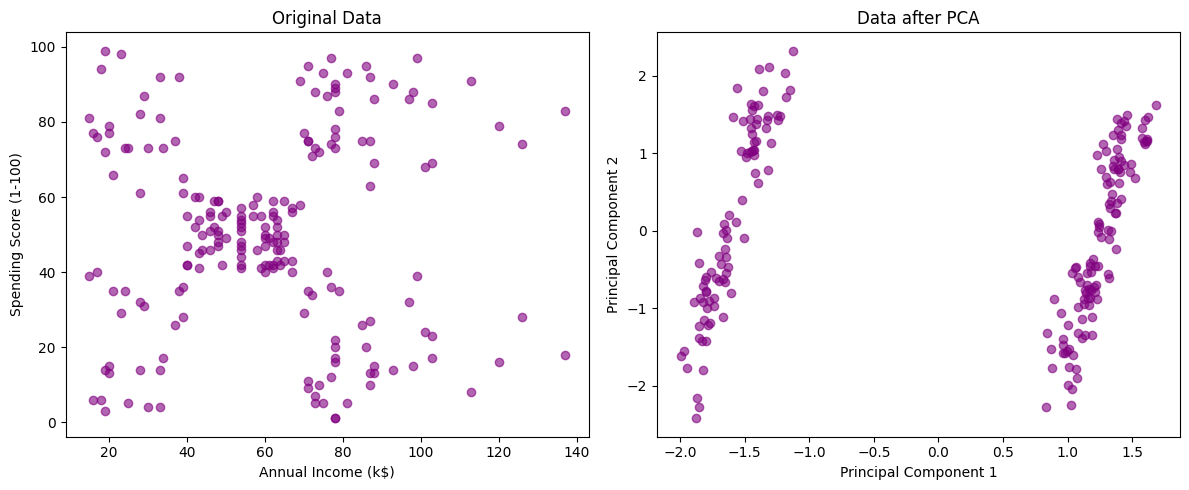

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Plot original data (e.g., Annual Income vs. Spending Score)
plt.figure(figsize=(12, 5))

# Left subplot: Original Data
plt.subplot(1, 2, 1)
plt.scatter(df_encoded['Annual Income (k$)'], df_encoded['Spending Score (1-100)'], c='purple', alpha=0.6) 
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Original Data')

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='purple', alpha=0.6) 
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data after PCA')
plt.tight_layout()
plt.show()

   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Female  \
0           1   19                  15                      39          False   
1           2   21                  15                      81          False   
2           3   20                  16                       6           True   
3           4   23                  16                      77           True   
4           5   31                  17                      40           True   

   Gender_Male  Cluster  
0         True        2  
1         True        2  
2        False        1  
3        False        3  
4        False        1  


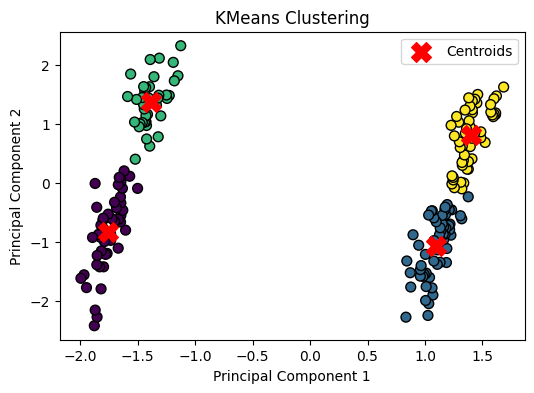

In [10]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)
df_encoded['Cluster'] = kmeans.labels_
print(df_encoded.head())

# Visualize the clusters
plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

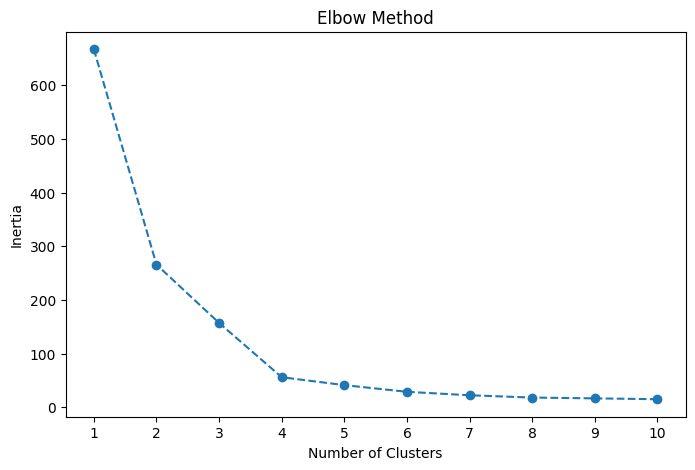

In [11]:
# Elbow Method to determine the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

In [12]:
df_encoded['Cluster'].value_counts()

Cluster
1    56
3    56
0    48
2    40
Name: count, dtype: int64

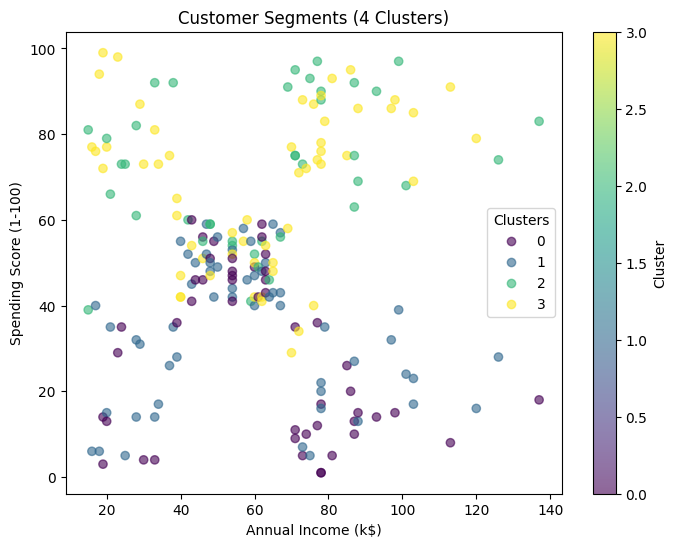

In [13]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_encoded['Annual Income (k$)'], df_encoded['Spending Score (1-100)'], c=df_encoded['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments (4 Clusters)')
plt.colorbar(label='Cluster')
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title="Clusters")
plt.show()

Gender   Female  Male
Cluster              
0             0    48
1            56     0
2             0    40
3            56     0


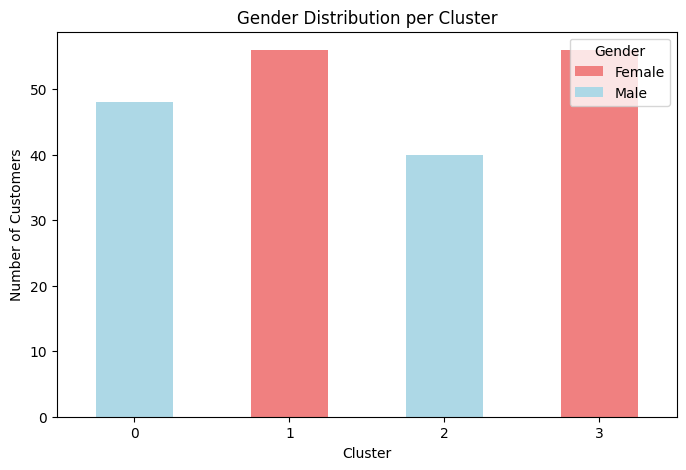

In [14]:
gender_cluster = pd.crosstab(df_encoded['Cluster'], df['Gender'])
print(gender_cluster)
gender_cluster.plot(kind='bar', stacked=True, figsize=(8, 5), color=['lightcoral', 'lightblue'])
plt.title('Gender Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.show()

In [15]:
cluster_summary_mean = df_encoded.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary_mean)

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        49.437500           62.416667               29.208333
1        47.803571           58.071429               34.875000
2        28.250000           62.000000               71.675000
3        28.392857           60.428571               68.178571


In [16]:
cluster_summary_min = df_encoded.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].min()
print(cluster_summary_min)

         Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                 
0         19                  19                       1
1         20                  16                       5
2         18                  15                      39
3         18                  16                      29


In [17]:
cluster_summary_max = df_encoded.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].max()
print(cluster_summary_max)

         Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                 
0         70                 137                      60
1         68                 126                      59
2         40                 137                      97
3         40                 120                      99


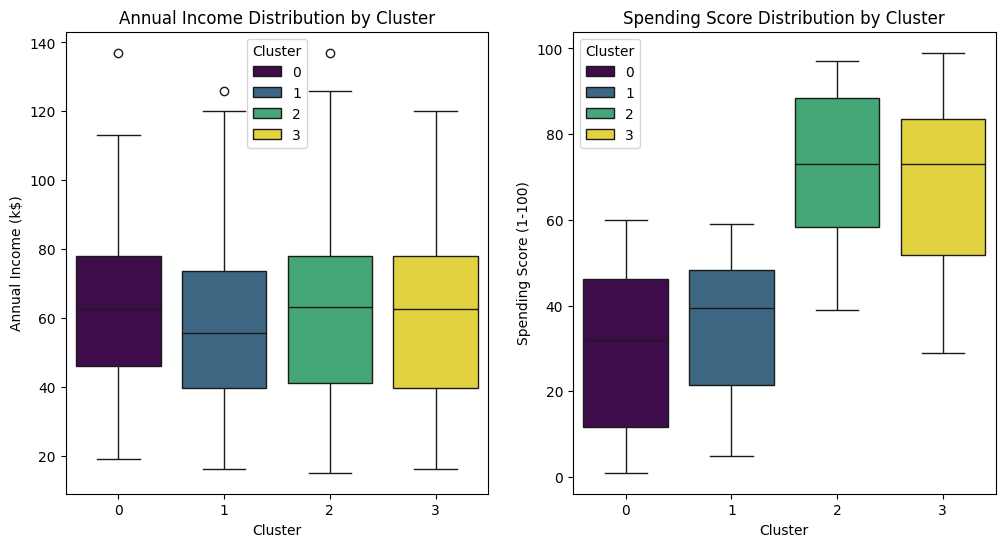

In [18]:
plt.figure(figsize=(12, 6))

# Boxplot for Annual Income
plt.subplot(1, 2, 1)
sns.boxplot(x=df_encoded['Cluster'], y=df_encoded['Annual Income (k$)'], hue=df_encoded['Cluster'], palette='viridis')
plt.title('Annual Income Distribution by Cluster')

# Boxplot for Spending Score
plt.subplot(1, 2, 2)
sns.boxplot(x=df_encoded['Cluster'], y=df_encoded['Spending Score (1-100)'], hue=df_encoded['Cluster'], palette='viridis')
plt.title('Spending Score Distribution by Cluster')

plt.show()
